# **Load Dependencies**

In [6]:
!pip install pycaret

In [7]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [8]:
df = pd.read_csv('Supermarket Data.csv')

In [9]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [10]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
775730     200635 2006-10-27             6          8         1   1.82   
775731     200642 2006-12-12             3         16         1   1.82   
775732     200703 2007-03-13             3         13         1   1.82   
775733     200818 2008-06-29             1         14         1   1.82   
775734     200648 2007-01-25             5         21         3   5.46   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
775730  PRD0902695      CL00070     DEP00020       G00007       D00002   
775731  PRD0902695      CL00070     DEP00020       G00007       D00002   
775732  PRD0902695      CL00070     DEP00020       G00007       D00002   
775733  PRD0902695      CL00070     DEP00020       G00007       D00002   
775734  PRD0902695      CL00070     DEP00020       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
775730  CUST0000179403                     MM             PE  994102900272123   
775731  CUST0000504972                     MM             YA  994103600486710   
775732  CUST0000732602                     MM             YF  994104900650795   
775733  CUST0000227510                     MM             OA  994111600316603   
775734  CUST0000504972                     MM             YA         99410420   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
775730           M                       UM  Small Shop   
775731           L                       MM   Full Shop   
775732           L                       UM      Top Up   
775733           M                       UM      Top Up   
775734         NaN                      NaN         NaN   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
775730                   Fresh  STORE00002           LS          W01  
775731                   Mixed  STORE00002           LS          W01  
775732                   Fresh  STORE00002           LS          W01  
775733                   Fresh  STORE00002           LS          W01  
775734                     NaN         NaN          NaN          NaN

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# **Prepare features**

In [11]:
df['CUST_LIFESTAGE'].replace(to_replace=['OA','OF','OT','PE','YA','YF'], value=[1,2,3,4,5,6], inplace=True)
df['BASKET_TYPE'].replace(to_replace=['Top Up','Full Shop','Small Shop','XX'], value=[1,2,3,0], inplace=True)
df['BASKET_DOMINANT_MISSION'].replace(to_replace=['Grocery','Fresh','Mixed','Nonfood','XX'],value =[1,2,3,4,0],inplace=True)

In [12]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  SHOP_HOUR=('SHOP_HOUR','mean'),
                                                                                  LifeStage=('CUST_LIFESTAGE','max'),
                                                                                  BasketType=('BASKET_TYPE','max'),
                                                                                  BasketMission=('BASKET_DOMINANT_MISSION','max')
                                                                                  ).reset_index()

In [13]:
df_csv.dropna()

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
1     CUST0000000369      603.95          195         98 2006-04-16   
5     CUST0000001194     2493.83          103        403 2006-04-22   
6     CUST0000002257        1.99            1          1 2006-07-21   
7     CUST0000002605        1.80            6          1 2006-10-08   
8     CUST0000002637      124.63           15         53 2006-08-03   
...              ...         ...          ...        ...        ...   
5710  CUST0000999569      628.21           78         22 2006-09-01   
5711  CUST0000999593      453.58           30        206 2006-05-06   
5712  CUST0000999645       58.77           10         23 2006-04-30   
5714  CUST0000999935      444.17           21        127 2006-11-29   
5715  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  SHOP_HOUR  LifeStage  BasketType  BasketMission  
1    2008-07-05  15.463964        1.0         3.0            4.0  
5    2008-06-20  17.501669        3.0         3.0            4.0  
6    2006-07-21  13.000000        5.0         3.0            4.0  
7    2008-06-12  13.666667        3.0         3.0            1.0  
8    2008-05-30  15.141176        1.0         3.0            3.0  
...         ...        ...        ...         ...            ...  
5710 2008-07-04  14.931818        3.0         3.0            3.0  
5711 2008-04-02  14.831650        6.0         3.0            4.0  
5712 2008-05-08  18.531250        3.0         3.0            4.0  
5714 2008-06-05  14.699153        6.0         3.0            4.0  
5715 2008-04-17  11.933333        6.0         3.0            3.0  

[4960 rows x 10 columns]

In [14]:
df_csv.head(20)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate  \
0   CUST0000000181        2.44            1          1 2007-01-06 2007-01-06   
1   CUST0000000369      603.95          195         98 2006-04-16 2008-07-05   
2   CUST0000000689      328.57           16        116 2007-07-22 2008-06-23   
3   CUST0000000998        5.95            3          4 2006-05-04 2006-07-07   
4   CUST0000001163       39.74            4         24 2006-10-22 2008-06-22   
5   CUST0000001194     2493.83          103        403 2006-04-22 2008-06-20   
6   CUST0000002257        1.99            1          1 2006-07-21 2006-07-21   
7   CUST0000002605        1.80            6          1 2006-10-08 2008-06-12   
8   CUST0000002637      124.63           15         53 2006-08-03 2008-05-30   
9   CUST0000002638       15.59            1          4 2007-04-14 2007-04-14   
10  CUST0000002813      145.02           12         73 2007-07-31 2008-04-12   
11  CUST0000003028       10.61            6          7 2007-09-16 2008-01-04   
12  CUST0000003044       21.77            2         10 2007-01-13 2007-01-24   
13  CUST0000003252        0.86            1          1 2007-10-11 2007-10-11   
14  CUST0000003287      254.10           13        122 2006-05-02 2008-05-10   
15  CUST0000003323        3.75            2          3 2007-01-01 2007-08-29   
16  CUST0000003667        6.98            1          2 2007-01-11 2007-01-11   
17  CUST0000004088      900.30           82        239 2006-04-13 2008-06-29   
18  CUST0000004507        1.24            1          1 2007-06-17 2007-06-17   
19  CUST0000004781        4.19            1          2 2007-10-25 2007-10-25   

    SHOP_HOUR  LifeStage  BasketType  BasketMission  
0   13.000000        NaN         3.0            2.0  
1   15.463964        1.0         3.0            4.0  
2   15.367568        NaN         3.0            4.0  
3   11.500000        NaN         3.0            4.0  
4   15.400000        NaN         3.0            3.0  
5   17.501669        3.0         3.0            4.0  
6   13.000000        5.0         3.0            4.0  
7   13.666667        3.0         3.0            1.0  
8   15.141176        1.0         3.0            3.0  
9   17.000000        5.0         3.0            2.0  
10  19.371134        3.0         3.0            3.0  
11  13.125000        3.0         3.0            2.0  
12  14.181818        6.0         2.0            2.0  
13   9.000000        6.0         3.0            3.0  
14  15.034091        6.0         3.0            4.0  
15  17.333333        5.0         3.0            3.0  
16  21.000000        3.0         3.0            2.0  
17  12.875439        4.0         3.0            4.0  
18  11.000000        3.0         3.0            1.0  
19  10.000000        3.0         3.0            2.0

In [15]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [16]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [17]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [18]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [19]:
df_csv.tail(5)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate  \
5711  CUST0000999593      453.58           30        206 2006-05-06   
5712  CUST0000999645       58.77           10         23 2006-04-30   
5713  CUST0000999654        0.93            1          1 2006-06-25   
5714  CUST0000999935      444.17           21        127 2006-11-29   
5715  CUST0000999936       17.67            6         13 2006-08-03   

       LastDate  SHOP_HOUR  LifeStage  BasketType  BasketMission  TicketSize  \
5711 2008-04-02  14.831650        6.0         3.0            4.0   15.119333   
5712 2008-05-08  18.531250        3.0         3.0            4.0    5.877000   
5713 2006-06-25  14.000000        NaN         1.0            2.0    0.930000   
5714 2008-06-05  14.699153        6.0         3.0            4.0   21.150952   
5715 2008-04-17  11.933333        6.0         3.0            3.0    2.945000   

      total_days  recency  
5711         698       95  
5712         740       59  
5713           1      742  
5714         555       31  
5715         624       80

# **Cluster customers**

In [20]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  7877
1                            Original Data            (5716, 13)
2                           Missing Values                  True
3                         Numeric Features                     9
4                     Categorical Features                     1
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (5716, 15)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  b555
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [21]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [22]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance


In [23]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.0365           106.2056  ...           0             0

[1 rows x 6 columns]

In [24]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering

In [25]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.6671            69.3297  ...           0             0

[1 rows x 6 columns]

In [26]:
plot_model(sc)

# KMeans Clustering


In [27]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.2535          1795.8588  ...           0             0

[1 rows x 6 columns]

In [28]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7877, tol=0.0001, verbose=0)


In [29]:
plot_model(kmeans)

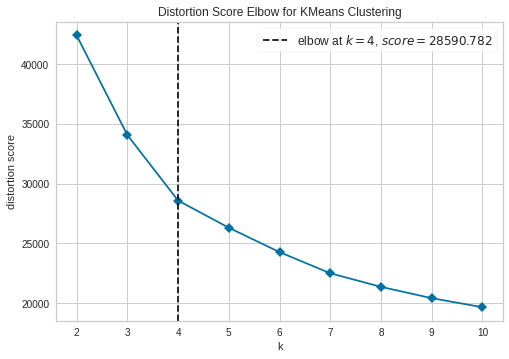

In [30]:
plot_model(kmeans, plot = 'elbow')

In [31]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [32]:
kmeans_results = assign_model(kmeans)

In [33]:
kmeans_results.head(5)

CUST_CODE  TotalSpend  TotalVisits  ...  total_days recency    Cluster
0  CUST0000000181        2.44            1  ...           1     547  Cluster 2
1  CUST0000000369      603.95          195  ...         812       1  Cluster 3
2  CUST0000000689      328.57           16  ...         338      13  Cluster 3
3  CUST0000000998        5.95            3  ...          65     730  Cluster 2
4  CUST0000001163       39.74            4  ...         610      14  Cluster 3

[5 rows x 14 columns]

In [34]:
plot_model(kmeans)

The cluster 0 : Not much in this customer group, highest ticket size but Recency is quite high. Potentially deal a long-term contract selling, delivery at their place and cross-selling for another potential products.

The cluster 1 : Rich customer, not much in quantity but high value and profitable, mainly non food purchasing, very active customers. Should be the customers near the shop location. They are our treasure, bind them with the premium membership with exclusive deal, offer and make sure they we can maintan them. Considerr to brach new line with the popular "non food" product

The cluster 2 : The most in quantity customers, low ticket size and high recency. Potential the normal customer, routinely check the price competitive of our products]

The cluster 3 : 2nd Most customers, Active user, Purchasing ast small shop mainly, Not much total spent. Try to upselling with more premium products.

In [35]:
plot_model(kmeans, plot = 'distribution')

In [36]:
plot_model(kmeans, plot = 'distribution', feature = 'BasketType')

In [37]:
plot_model(kmeans, plot = 'distribution', feature = 'BasketMission')

In [38]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSpend')

In [39]:
plot_model(kmeans, plot = 'distribution', feature = 'TicketSize')

In [40]:
plot_model(kmeans, plot = 'distribution', feature = 'recency')

In [41]:
plot_model(kmeans, plot = 'distribution', feature = 'LifeStage')

In [42]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalVisits')

In [43]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSKUs')